# Visual 1

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv("visual_1.csv", header=None)
df1.columns = ['year', 'month', 'sum']
df2 = pd.read_csv("visual_2.csv", header=None)
df2.columns = ['ticker', 'datetime', 'price']
df2['datetime'] = pd.to_datetime(df2['datetime'])

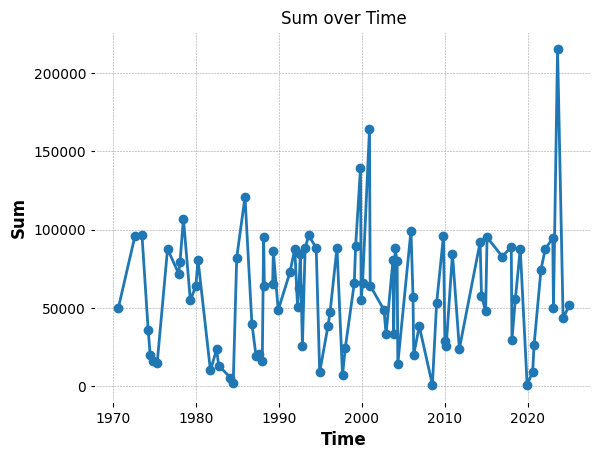

In [49]:
df1['date'] = pd.to_datetime(df1[['year', 'month']].assign(day=1))
plt.plot(df1['date'], df1['sum'], marker='o')
plt.title('Sum over Time')
plt.xlabel('Time')
plt.ylabel('Sum')
plt.grid(True)
plt.show()

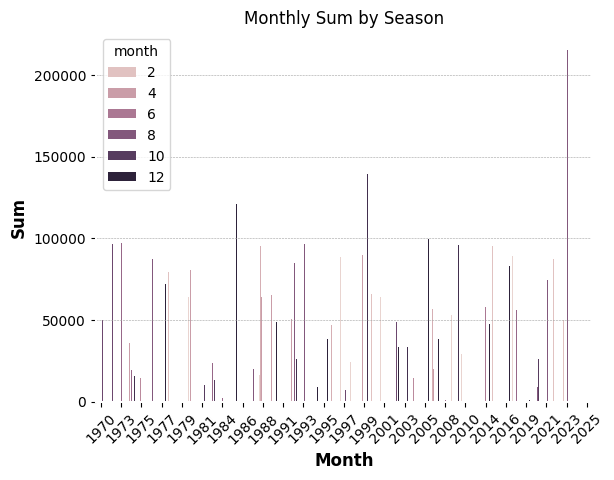

In [50]:
import seaborn as sns
sns.barplot(x='year', y='sum', hue='month', data=df1)
plt.title('Monthly Sum by Season')
plt.xlabel('Month')
plt.ylabel('Sum')

current_xticks = plt.gca().get_xticks()
plt.xticks(current_xticks[::2], rotation=45)

plt.show()

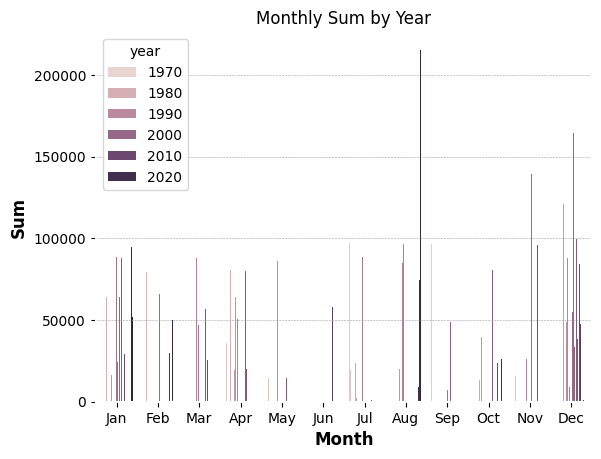

In [51]:
sns.barplot(data=df1, x='month', y='sum', hue='year')

plt.title('Monthly Sum by Year')
plt.xlabel('Month')
plt.ylabel('Sum')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# visual 2


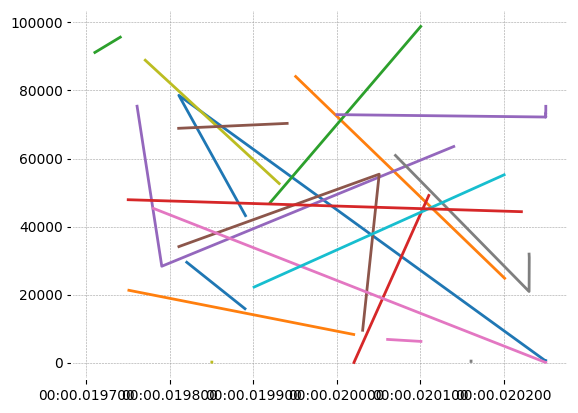

In [52]:
for stock in df2['ticker'].unique():
  subset = df2[df2['ticker'] == stock]
  plt.plot(subset['datetime'], subset['price'])

plt.show()

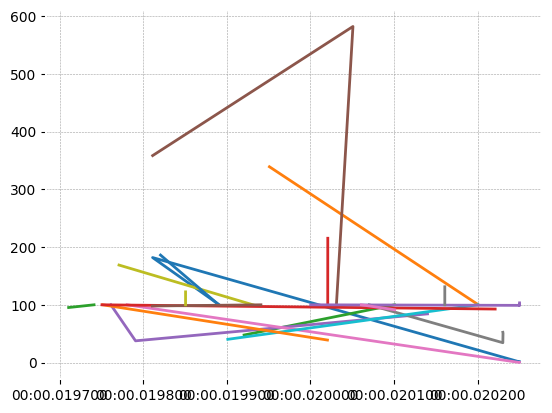

In [53]:
df2['normalized_price'] = df2.groupby('ticker')['price'].transform(lambda x: x / x.iloc[0] * 100)

for stock in df2['ticker'].unique():
  subset = df2[(df2['ticker'] == stock) & (df2['normalized_price'] <20000)]
  plt.plot(subset['datetime'], subset['normalized_price'])


plt.show()

In [54]:
pip install mplfinance

<ipython-input-55-572205837553>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = subset.resample('M').agg({


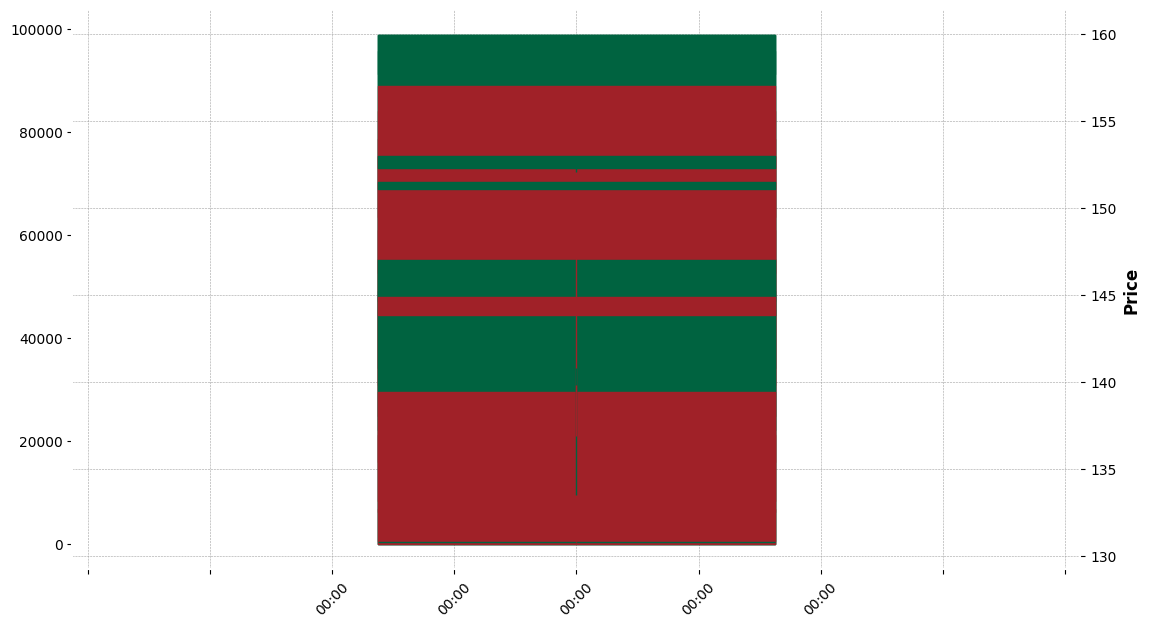

In [55]:
import mplfinance as mpf

df3 = pd.read_csv('visual_2.csv', header=None, parse_dates=True)
df3.columns = ['ticker', 'datetime', 'price']

df3.index = pd.DatetimeIndex(df3['datetime'])

add_plots = []

for ticker_selected in df2['ticker'].unique():
  subset = df3[df3['ticker'] == ticker_selected]
  monthly_data = subset.resample('M').agg({
      'price': ['first', 'max', 'min', 'last']  # Open, High, Low, Close
  })
  monthly_data.columns = ['Open', 'High', 'Low', 'Close']
  add_plots.append(mpf.make_addplot(monthly_data, type='candle', panel=0))

mpf.plot(monthly_data, type='candle', style="charles", addplot=add_plots, figsize=(14,8))

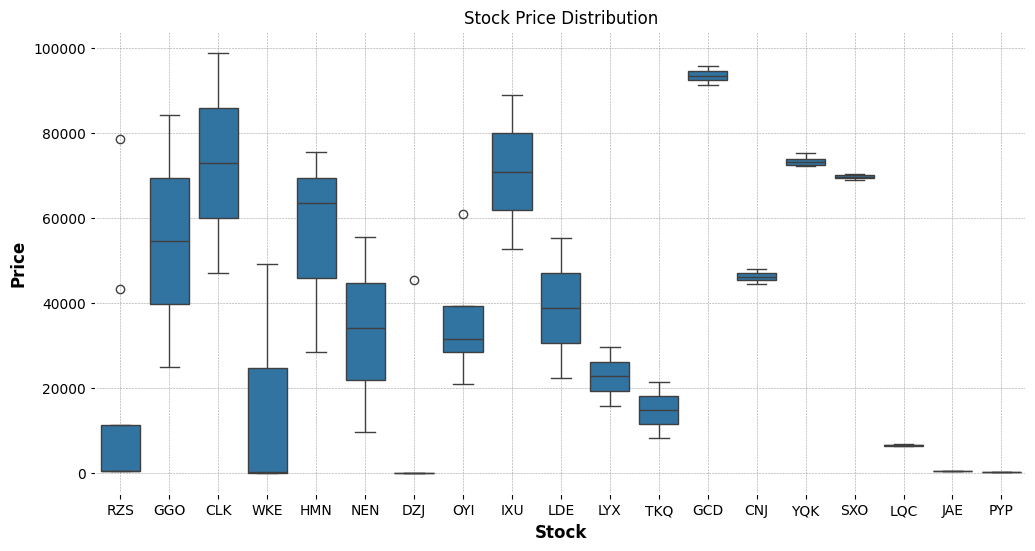

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ticker', y='price', data=df2)
plt.title("Stock Price Distribution")
plt.xlabel("Stock")
plt.ylabel("Price")
plt.grid(True)
plt.show()
